In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
df = pd.read_csv('./Datasets/ramen-ratings.csv')

## Cleaning and EDA

In [72]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [73]:
df.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [74]:
type(df['Stars'][0])

str

#### The stars column values are strings. Need to convert to float.

In [75]:
df['Stars'].apply(lambda rating: float(rating))

ValueError: could not convert string to float: 'Unrated'

#### Need to remove entries for which there is no rating.

In [76]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [77]:
df.drop(df[df['Stars'] == 'Unrated'].index, inplace=True)

In [78]:
df['Stars'] = df['Stars'].apply(lambda rating: float(rating))

In [79]:
type(df['Stars'][0])

numpy.float64

In [80]:
df.describe()

,Review #,Stars
count,2577.000000,2577.000000
mean,1289.443927,3.654676
std,744.569010,1.015331
min,1.000000,0.000000
25%,645.000000,3.250000
50%,1289.000000,3.750000
75%,1934.000000,4.250000
max,2580.000000,5.000000


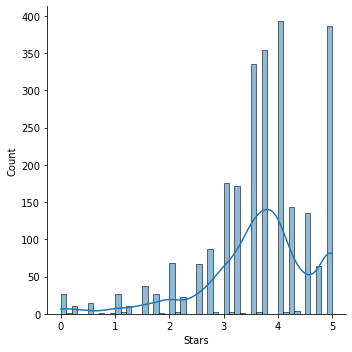

In [81]:
sns.displot(df['Stars'], kde=True, bins=50)

<AxesSubplot:xlabel='Style', ylabel='count'>

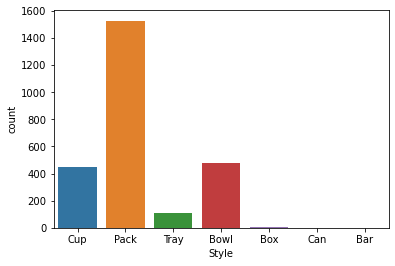

In [82]:
sns.countplot(x = df['Style'])

#### Packs are the most popular style of packaging by far.
#### Bowls and cups are about the same level of popularity.

In [83]:
df['Style'].value_counts()

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

#### Remove styles of packaging that are not common enough to be meaningful.

In [84]:
df.drop(df[df['Style'] == 'Bar'].index, inplace=True)
df.drop(df[df['Style'] == 'Box'].index, inplace=True)
df.drop(df[df['Style'] == 'Can'].index, inplace=True)

<AxesSubplot:xlabel='Style', ylabel='count'>

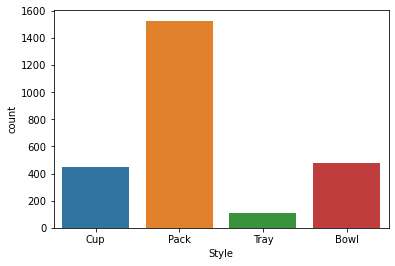

In [85]:
sns.countplot(x = df['Style'])

#### Remove Top 10 column.

In [86]:
df.drop(['Top Ten'], axis=1, inplace=True)

In [101]:
df.nunique()

Review #    2569
Brand        351
Variety     2402
Style          4
Country       38
Stars         42
dtype: int64

#### Find the top ten brands.

In [124]:
df['Brand'].value_counts().head(10)

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     51
Ottogi            45
Lucky Me!         34
Name: Brand, dtype: int64